In [1]:
import zipfile
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 1: Unzip the uploaded file in Google Colab
zip_file_path = 'airpollution.zip'  # Path to your uploaded zip file
extract_dir = '/content/airpollution'  # Directory to unzip the file into

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

os.listdir(extract_dir)

clean_dir = os.path.join(extract_dir, 'clean')  # Folder with clean air images
poll_dir = os.path.join(extract_dir, 'polluted')      # Folder with polluted air images

In [2]:
def load_images_from_directory(directory, label):
    image_data = []
    labels = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        img = image.load_img(img_path, target_size=(108, 162))  # Resize to 108x162
        img_array = image.img_to_array(img)  # Convert the image to a numpy array
        image_data.append(img_array)
        labels.append(label)
    return np.array(image_data), np.array(labels)

# Load clean and polluted images
clean_images, clean_labels = load_images_from_directory(clean_dir, 0)  # Label 0 for clean air
polluted_images, polluted_labels = load_images_from_directory(poll_dir, 1)  # Label 1 for polluted air

# Combine data and labels from both classes
X = np.concatenate((clean_images, polluted_images), axis=0)
y = np.concatenate((clean_labels, polluted_labels), axis=0)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Normalize the images (scale pixel values to [0, 1])
X_train = X_train / 255.0
X_test = X_test / 255.0

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [31]:
model = tf.keras.Sequential([
    # CNN 1
    tf.keras.layers.Conv2D(2, (3,3), activation='relu', input_shape=(108, 162, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    # CNN 2
    tf.keras.layers.Conv2D(4, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # CNN 3
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # CNN 4
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # CNN 5
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Global Average Pooling to reduce parameters
    tf.keras.layers.GlobalAveragePooling2D(),

    # Fully-connected layer with fewer neurons
    tf.keras.layers.Dense(128, activation='relu'),

    # Output layer (binary classification)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Summary of the model to check layer outputs
model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)              │ (None, 106, 160, 2)    │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 53, 80, 2)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 51, 78, 4)      │            76 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 25, 39, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 23, 37, 8)      │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 11, 18, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 9, 16, 16)      │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 4, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 2, 6, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 1, 3, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_9      │ (None, 16)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,221 (24.30 KB)

 Trainable params: 6,221 (24.30 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',  # Adagrad optimizer
              metrics=['accuracy'])

#train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=35, verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

model.save('air_poll_classifier_sgd2to32.keras')

Epoch 1/35
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.8581 - loss: 0.3263 - val_accuracy: 0.8238 - val_loss: 0.4130
Epoch 2/35
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8791 - loss: 0.2972 - val_accuracy: 0.8377 - val_loss: 0.3630
Epoch 3/35
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8860 - loss: 0.2765 - val_accuracy: 0.8411 - val_loss: 0.3949
Epoch 4/35
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8866 - loss: 0.2791 - val_accuracy: 0.8532 - val_loss: 0.3798
Epoch 5/35
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8856 - loss: 0.2894 - val_accuracy: 0.8411 - val_loss: 0.3340
Epoch 6/35
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8921 - loss: 0.2795 - val_accuracy: 0.8428 - val_loss: 0.3506
Epoch 7/35
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8823 - loss: 0.2726 - val_accuracy: 0.8480 - val_loss: 0.3561
Epoch 8/35
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8917 - loss: 0.2623 - val_accuracy: 0.8463 - val_loss

In [36]:
#prediction function
def predict_air_quality(img_path, model):
    img = image.load_img(img_path, target_size=(108, 162))
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension to represent the batch size

    img_array = img_array / 255.0  # Rescale pixel values to [0, 1]

    prediction = model.predict(img_array)

    # Classify as polluted (1) or clean (0)
    if prediction[0] > 0.5:
        return 'polluted'
    else:
        return 'clean'

In [37]:
import zipfile
import os

zip_file_path = 'test.zip'

extract_dir = './test'

# Create the folder if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Contents extracted to {extract_dir}")

Contents extracted to ./test


In [38]:
my_model = tf.keras.models.load_model('air_poll_classifier_sgd2to32.keras')

In [ ]:
# Assuming the list of images is defined
folder_path = './test/'
all_files = os.listdir(folder_path)

images = [file for file in all_files if file.endswith('.jpg')]

results = []
img_paths = []
for i, img_name in enumerate(images):
    img_paths.append(folder_path + img_name)  # Full path to the image
    results.append(predict_air_quality(img_paths[i], my_model))


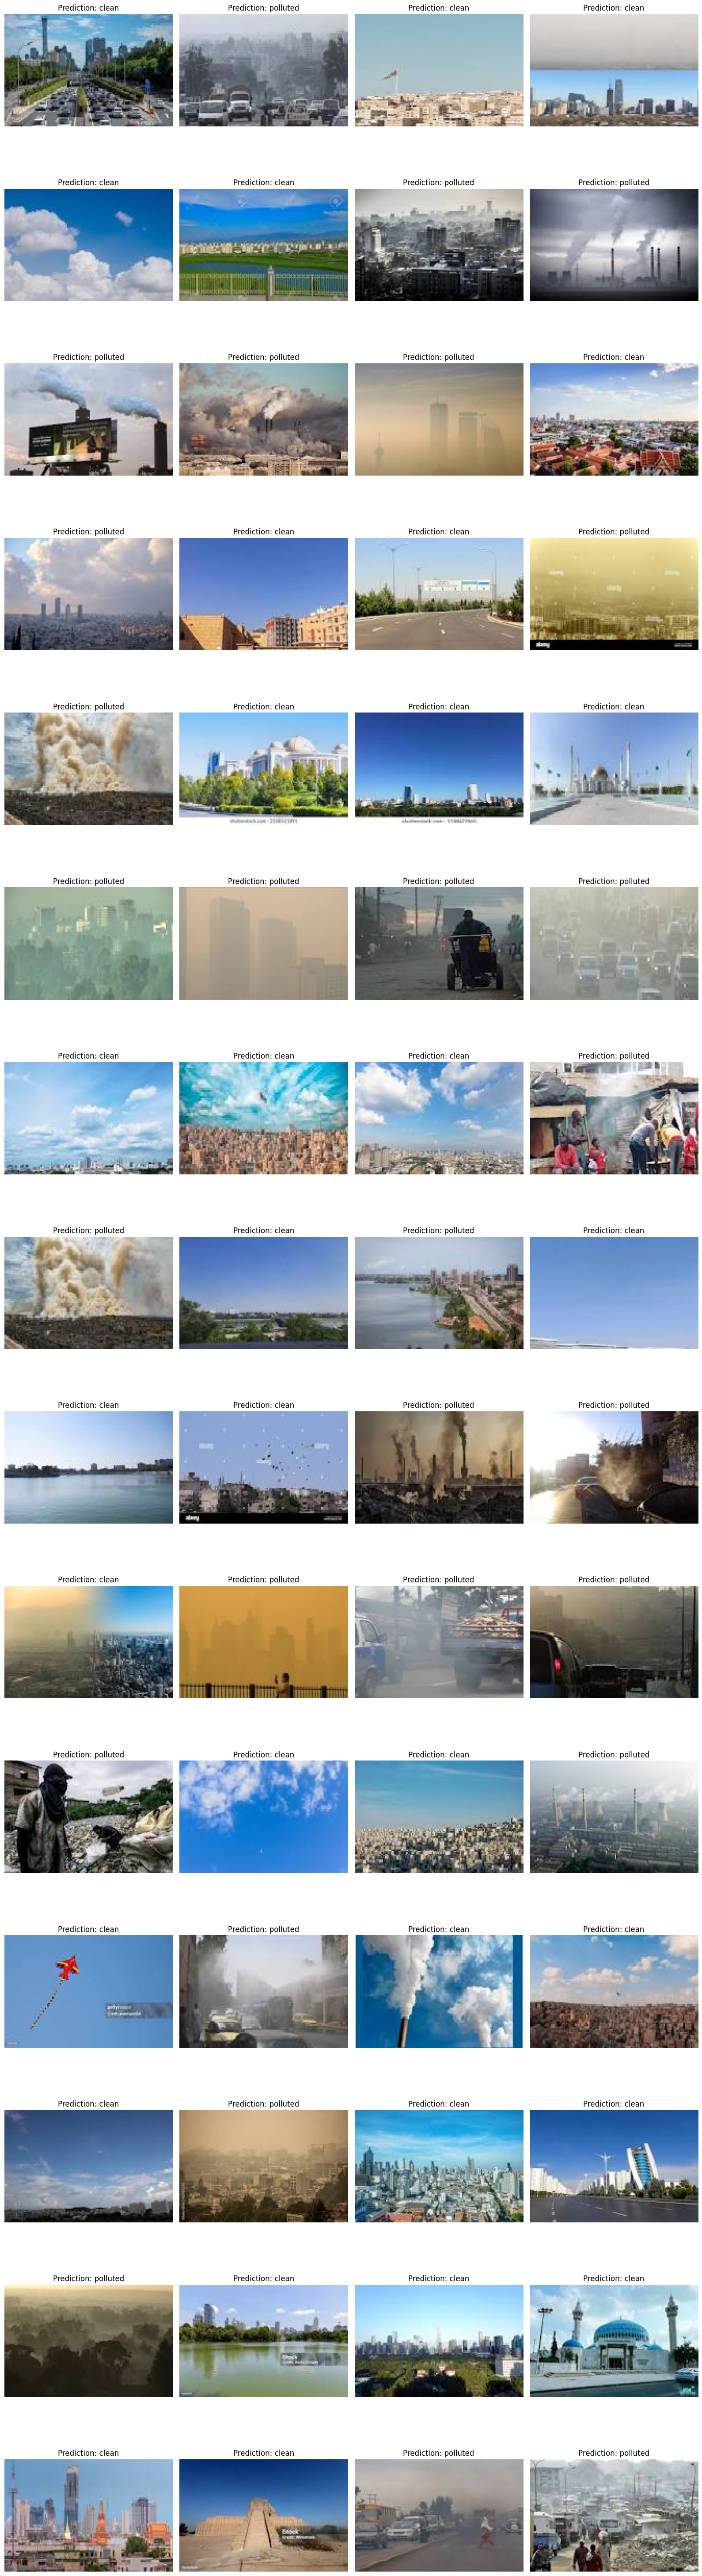

In [48]:
# Calculate the number of rows needed for 4 images per row
num_images = len(images)
num_cols = 4
num_rows = (num_images + num_cols - 1) // num_cols  # Round up to make sure all images fit

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))

# Flatten axes for easier indexing
axes = axes.flatten()

for i,img_name in enumerate(images):
    img = image.load_img(img_paths[i], target_size=(108, 162))

    # Display each image in the respective subplot
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axis labels
    axes[i].set_title(f'Prediction: {results[i]}')

# Hide any extra axes if the number of images isn't a perfect multiple of 4
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()